# Class + related functions to work with a single Micrometeoroid Impact.

Written by Sophie Hourihane - based on work by Ira Thorpe and Nicole Pagane


8/1/2018

### Class functions that might be useful
The impact class has basically everything necessary for working with impacts, but a lot of complicated functions are behind the scenes 

#### Coordinate Conversions
All coordinates are definined in the initialization of the class (which makes them large objects) but here they are for reference anyways
##### SCtoECI
- Transforms from spacecraft frame to **E**arth **C**entered **I**ntertial
    - specifically J2000

##### ECI_to_SUN
- Transforms from spacecraft frame to Sun Centered Ecliptic frame HEEQ
    - direction of earth around sun = (-90, 0) (prograde)
    - Sun is (0,0)
    - Direction of retrograde orbit (90, 0)
    

In [1]:
# import relevant libraries
import numpy as np
import os
import pathlib
import healpy as hp
import pickle
import matplotlib.pyplot as plt
import microTools
import datetime
from impactClass import impactClass
from impactClass import impactClassList
import copy
%matplotlib inline

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### Initialize individual impact
Assuming your directory structure is correct & you have the pickle files, everything should work out nicely

In [14]:
# pick a segment time and load the data 
segment = 1164554230#1156243803 #1147740231

# setup directory structure
p = pathlib.PurePath(os.getcwd())
BASE_DIR = str(p.parent)
dataDir = '/data'
directory = dataDir + '/ONLY_IMPACTS'

# load GRS1
chainFile = BASE_DIR + directory + '/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid, encoding = 'latin1')
impact1 = impactClass(chainFile, dataDir = dataDir, BASE_DIR = BASE_DIR)
fid.close()

# load GRS2
chainFile = BASE_DIR + directory + '/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    impact2 = impactClass(chainFile, dataDir = dataDir, BASE_DIR = BASE_DIR)

    fid.close()

# make plot directory
plotDir = BASE_DIR + '/plots/' + str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)
    
print(impact1.isImpact)
print(impact1.isGlitch)


True
False


In [39]:
df_veto = impact1.getVetoList()

index = df_veto.index[df_veto['segment'] == 1][0]
df_veto['isGlitch'].values[index]

#index = df_veto['segment'].index.get_loc(impact1.segment)
#print(df_veto)
#print(df_veto.isGlitch[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

True
False


### Impact Plots
Most of these were written sometime in the summer of 2017, edited in 2018

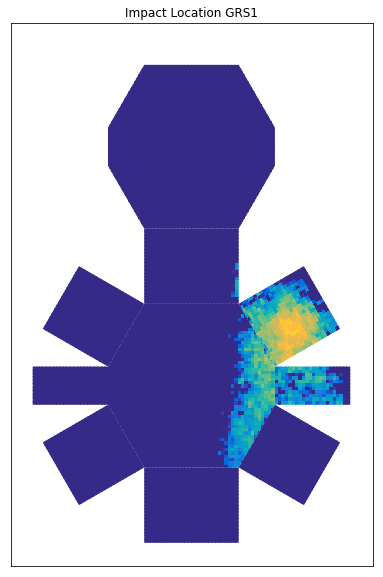

In [4]:
# Make a Flattened version of the LPF
fig = impact1.makeFlatLPF( N = 50, scale = 'log')
fig.savefig(plotDir + '/flat_LPF_log_GRS1.png', format = 'png')

##### 3D LPF
The functions commented out work correctly, they are just slow and I wanted to show off other functions

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/matplotlib/colors.py:486: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


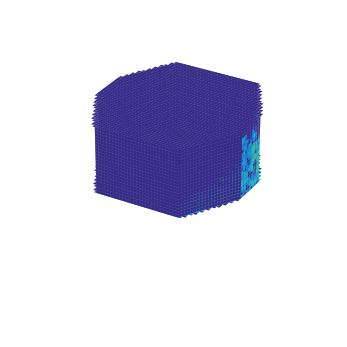

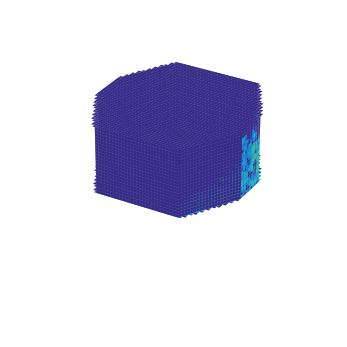

In [5]:
# 3D LPF Working Correctly

# Creates a single 3D image
impact1.make3DLPF()

# Creates Directory for future gifs
#impact1.fillGifDir(BASE_DIR + '/plots/' + str(segment))

# Creates gif using above directory
#impact1.gif_maker(BASE_DIR + '/plots/' + str(segment))

/Users/shouriha/LISAPathfinder/scripts/Analysis/scripts/impactClass.py:747: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c_x1x1, x1e = np.histogram(x1, xe, normed = True)
/Users/shouriha/LISAPathfinder/scripts/Analysis/scripts/impactClass.py:748: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c_x2x2, x1e = np.histogram(x2, xe, normed = True)


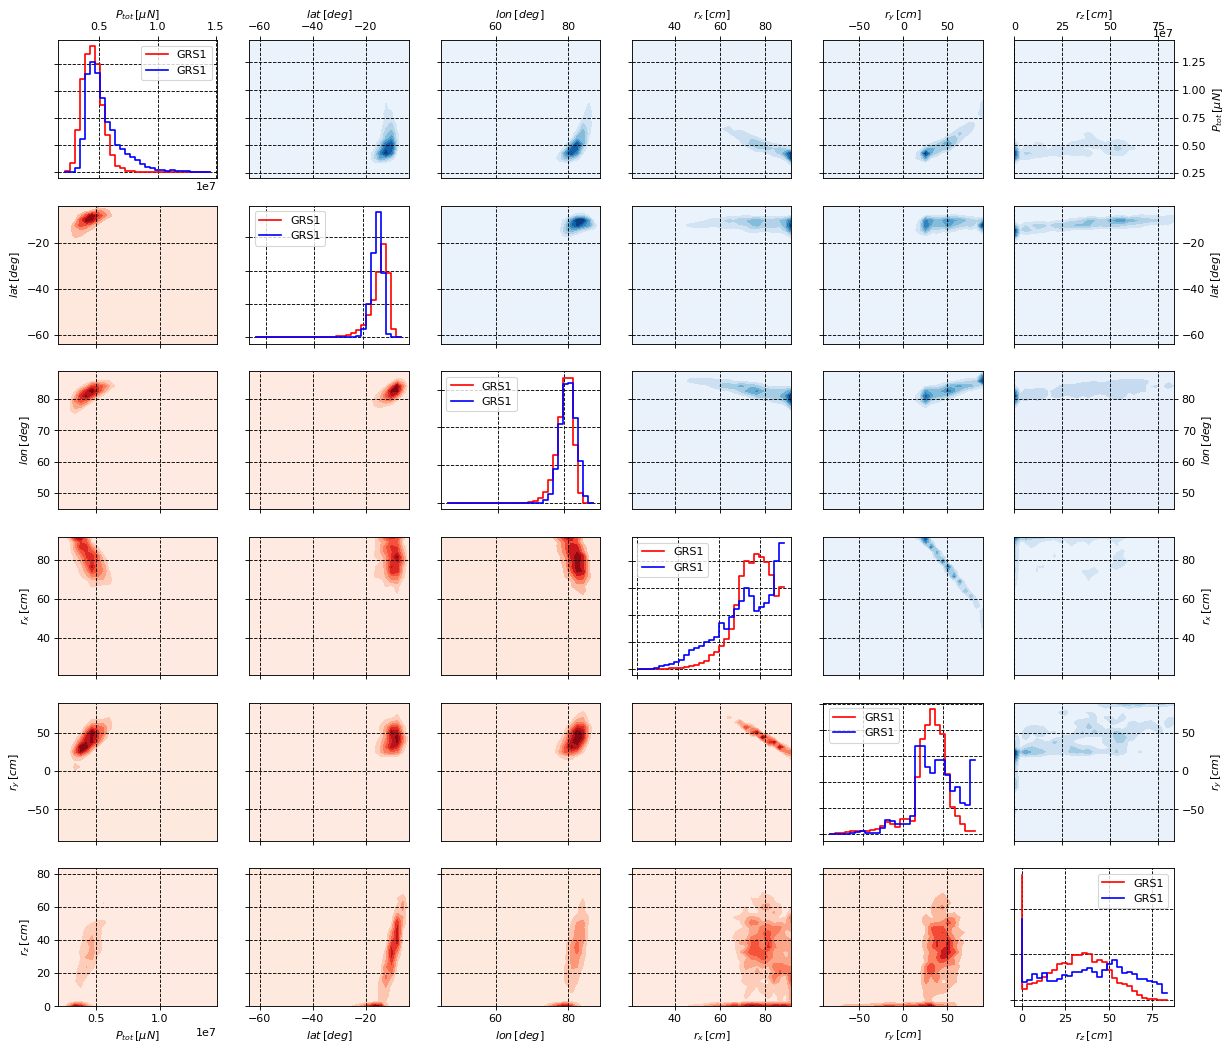

In [6]:
# Dual Corner Working Correctly
fig = impact1.dualCorner(impact2)
fig.savefig(plotDir + '/dualCorner.png', format = 'png')

# This was the command in Microtools
#hf = microTools.dualCorner(data1,data2)
#hf.savefig(plotDir+'/dualCorner.png',format='png')

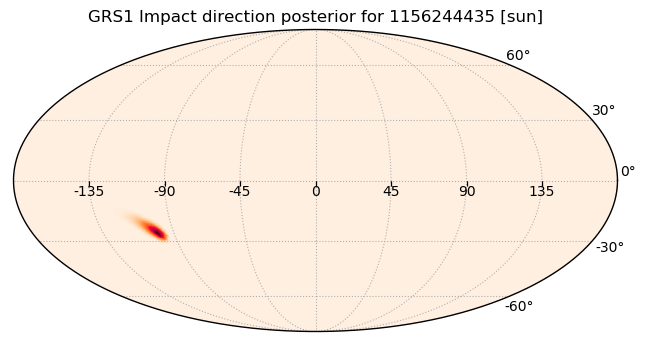

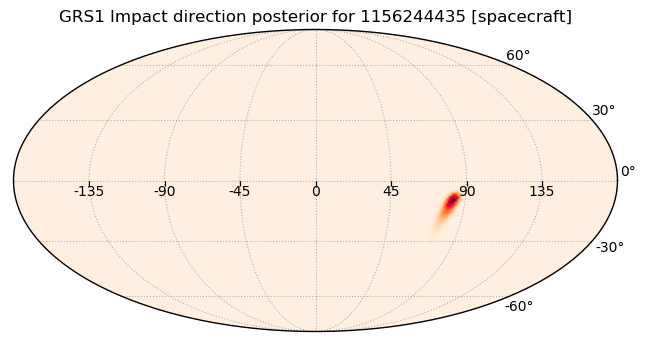

In [7]:
# make the skymaps in the two frames
# Mollewide Working Correctly

# Sun coordinates
fig = impact1.makeMollweide(frame = 'sun')
fig.savefig(plotDir + '/sky_sun1.png', format = 'png')
# Spacecraft coordinates
fig = impact1.makeMollweide(frame = 'sc')
fig.savefig(plotDir + '/sky_sc1.png', format = 'png')
